In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
assi_df_1=pd.read_excel('assigned_tech.xlsx')

In [5]:
assi_df_1.head()

,Unnamed: 0,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,tech_cancl,Inc_per_tech,Inc_canc,Zip_income
0,0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,1,8,23933.540000,191468.320000,23933.540000
1,1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,2,4,32616.015000,130464.060000,68711.216667
2,2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,3,2,8731.773333,17463.546667,110329.465000
3,3,6,264.00,32,69,2,1,846.000000,406.250000,9,1,1,264.000000,264.000000,32925.410000
4,4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,2,3,24253.080000,72759.240000,83225.340000


In [6]:
assi_df_1=assi_df_1.drop(['Unnamed: 0'],axis=1)

In [7]:
assi_df_1.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Avg_per_day', 'tech_cancl', 'Inc_per_tech', 'Inc_canc', 'Zip_income'],
      dtype='object')

In [64]:
assi_df=assi_df_1[['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count','Zip_income']]

In [65]:
assi_df.head()

,Completed Jobs,Income,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Zip_income
0,57,23933.54,60,65,10,8,3617.444828,3224.412750,59,23933.540000
1,77,65232.03,64,71,9,7,1781.345385,965.365854,40,68711.216667
2,55,26195.32,58,69,3,4,459.248750,1377.666667,21,110329.465000
3,6,264.00,32,69,2,1,846.000000,406.250000,9,32925.410000
4,73,48506.16,62,77,8,5,1820.060789,1646.943488,60,83225.340000


<AxesSubplot:>

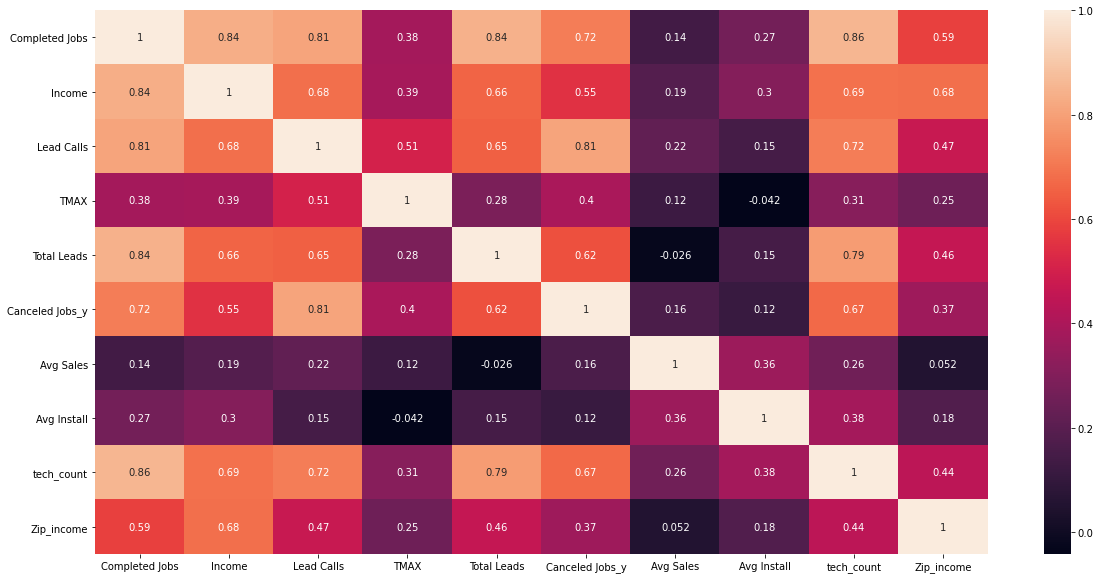

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(assi_df.corr(method='spearman'),annot=True)

In [67]:
assi_df.columns

Index(['Completed Jobs', 'Income', 'Lead Calls', 'TMAX', 'Total Leads',
       'Canceled Jobs_y', 'Avg Sales', 'Avg Install', 'tech_count',
       'Zip_income'],
      dtype='object')

In [68]:
train=assi_df[0:300]
test=assi_df[300:]

In [69]:
y=train['Income']
X=train.drop(['Income'],axis=1)

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
import xgboost as xgb
xgbst_reg=xgb.XGBRegressor()

In [72]:
xgbst_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
xgbst_reg.score(X_train,y_train)

0.9999998771881227

In [74]:
xgbst_reg.score(X_test,y_test)

0.7936565254320637

In [75]:
y_=test['Income']
X_=test.drop(['Income'],axis=1)

In [76]:
X_

,Completed Jobs,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Zip_income
300,123,76,59,25,9,1158.282857,1261.215200,42,180552.875000
301,50,77,56,8,2,1426.390000,581.363636,17,63902.248750
302,6,30,68,4,5,1872.500000,0.000000,12,77898.778571
303,111,67,63,32,10,1597.616912,2062.083333,39,114534.210000
304,131,74,72,40,6,1218.771111,1688.327612,61,124654.106667
305,131,74,72,40,6,1218.771111,1688.327612,61,87915.713333
306,108,98,74,23,9,1418.769895,1276.271017,50,102857.380000
307,118,79,64,32,5,1600.403596,2369.180000,70,96830.316667
308,116,66,65,26,12,1678.413214,2461.841463,37,82920.440000
309,53,72,72,5,1,1225.002424,2499.642857,17,36992.000000


In [77]:
y_.median()

82920.44

In [78]:
xgbst_reg.score(X_,y_)

0.4816955066981211

In [60]:
y_pred=xgbst_reg.predict(X_)

In [61]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_,y_pred)))

MAE: 27585.315802025874
RMSE: 36537.33633973512


In [26]:
comp=pd.DataFrame({'Actual':y_,'Predicted':y_pred})

<AxesSubplot:>

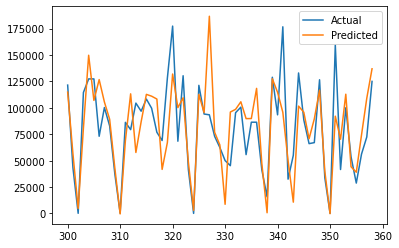

In [27]:
comp.plot()

# Hyper Parameter tuning

In [28]:
# Hyperparameter tuning with RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV


In [29]:
# Hyparameter ranges 

from scipy.stats import randint


parameters = {'n_estimators': randint(100,1200),
               'learning_rate': [0.001,0.002,0.003,0.005,0.01,0.04,0.05,0.1,0.2,0.3,0.4,0.5,0.6],
               'max_depth': randint(5,40),
               'subsample': [0.5,0.6,0.7,0.8],
               'min_child_weight': randint(1,10)  }


In [30]:
# Model for tuning

base_learner=xgb.XGBRegressor()


In [31]:
# Tuning 

tuned_model= RandomizedSearchCV(estimator = base_learner, param_distributions = parameters,scoring='neg_root_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [32]:
tuned_model.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.4min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000209EDE57358>,
                                        'min_child_weight': <

In [33]:
tuned_model.best_params_

{'learning_rate': 0.005,
 'max_depth': 5,
 'min_child_weight': 8,
 'n_estimators': 611,
 'subsample': 0.6}

In [34]:
tuned_model.best_score_

-36382.83364428425

In [35]:
# Best model

best_model=xgb.XGBRegressor(learning_rate= 0.005,max_depth=5,min_child_weight=8,n_estimators=611,subsample= 0.6)

In [36]:
best_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.005, max_delta_step=0, max_depth=5,
             min_child_weight=8, missing=nan, monotone_constraints='()',
             n_estimators=611, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
best_model.score(X_train,y_train)

0.8669822828831779

In [38]:
best_model.score(X_test,y_test)

0.8025768700248612

In [39]:
best_model.score(X_,y_)

0.6580658486591615

In [40]:
X_

,Completed Jobs,Lead Calls,TMAX,Total Leads,Canceled Jobs_y,Avg Sales,Avg Install,tech_count,Avg_per_day,Zip_income
300,123,76,59,25,9,1158.282857,1261.215200,42,3,180552.875000
301,50,77,56,8,2,1426.390000,581.363636,17,3,63902.248750
302,6,30,68,4,5,1872.500000,0.000000,12,1,77898.778571
303,111,67,63,32,10,1597.616912,2062.083333,39,3,114534.210000
304,131,74,72,40,6,1218.771111,1688.327612,61,3,124654.106667
305,131,74,72,40,6,1218.771111,1688.327612,61,3,87915.713333
306,108,98,74,23,9,1418.769895,1276.271017,50,3,102857.380000
307,118,79,64,32,5,1600.403596,2369.180000,70,2,96830.316667
308,116,66,65,26,12,1678.413214,2461.841463,37,4,82920.440000
309,53,72,72,5,1,1225.002424,2499.642857,17,4,36992.000000


In [41]:
y_pred_1=best_model.predict(X_)

In [42]:
comp_2=pd.DataFrame({'Actual':y_,'Predicted':y_pred_1})

<AxesSubplot:>

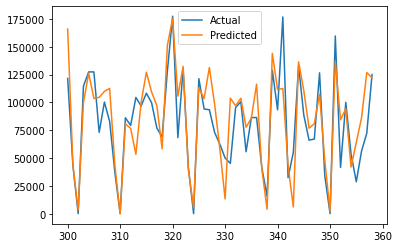

In [43]:
comp_2.plot()

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_, y_pred_1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_,y_pred_1)))

MAE: 17919.746890682927
RMSE: 24403.62237069081
